<a href="https://colab.research.google.com/github/jeyvong/hw_1.1.15/blob/main/hw_1_1_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Введение в машинное обучение. KNN. Метрики качества. Матрица ошибок**

Импорт библиотек

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier


**Загрузите данные**

In [2]:
url = "https://raw.githubusercontent.com/jeyvong/hw_1.1.15/main/diabetes.csv"

In [3]:
diabetes = pd.read_csv(url)

Приведение заголовков к строчным симолам

In [4]:
diabetes.rename(columns=lambda x: x.lower().replace(" ", ""), inplace=True)


Проверка импорта датасета

In [5]:
diabetes.head(8)

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0


**Проведите EDA(Exploratory Data Analysis)**

In [6]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pregnancies               768 non-null    int64  
 1   glucose                   768 non-null    int64  
 2   bloodpressure             768 non-null    int64  
 3   skinthickness             768 non-null    int64  
 4   insulin                   768 non-null    int64  
 5   bmi                       768 non-null    float64
 6   diabetespedigreefunction  768 non-null    float64
 7   age                       768 non-null    int64  
 8   outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
diabetes.dtypes.value_counts()

int64      7
float64    2
dtype: int64

Проведение EDA(ExploratoryDataAnalysis)

a) Доля пропусков

In [8]:
diabetes.isnull().mean() * 100

pregnancies                 0.0
glucose                     0.0
bloodpressure               0.0
skinthickness               0.0
insulin                     0.0
bmi                         0.0
diabetespedigreefunction    0.0
age                         0.0
outcome                     0.0
dtype: float64

В датасете нет пропущенных значений. Доля пропусков для каждого из параметров составляет 0%.

b) Максимальное и минимальное значение

In [9]:
data_summary = pd.DataFrame({
    'dtype': diabetes.dtypes,
    'min': diabetes.min(),
    'max': diabetes.max()
})

data_summary

,dtype,min,max
pregnancies,int64,0.000,17.00
glucose,int64,0.000,199.00
bloodpressure,int64,0.000,122.00
skinthickness,int64,0.000,99.00
insulin,int64,0.000,846.00
bmi,float64,0.000,67.10
diabetespedigreefunction,float64,0.078,2.42
age,int64,21.000,81.00
outcome,int64,0.000,1.00


c) Среднее значение

In [10]:
data_summary = pd.DataFrame({
    'dtype': diabetes.dtypes,
    'mean': diabetes.mean()
})

data_summary

,dtype,mean
pregnancies,int64,3.845052
glucose,int64,120.894531
bloodpressure,int64,69.105469
skinthickness,int64,20.536458
insulin,int64,79.799479
bmi,float64,31.992578
diabetespedigreefunction,float64,0.471876
age,int64,33.240885
outcome,int64,0.348958


d) Медиану

In [11]:
data_summary = pd.DataFrame({
    'dtype': diabetes.dtypes,
    'median': diabetes.median()
})
data_summary

,dtype,median
pregnancies,int64,3.0000
glucose,int64,117.0000
bloodpressure,int64,72.0000
skinthickness,int64,23.0000
insulin,int64,30.5000
bmi,float64,32.0000
diabetespedigreefunction,float64,0.3725
age,int64,29.0000
outcome,int64,0.0000


e) Дисперсия

In [12]:
data_summary = pd.DataFrame({
    'dtype': diabetes.dtypes,
    'var': diabetes.var()
})
data_summary

,dtype,var
pregnancies,int64,11.354056
glucose,int64,1022.248314
bloodpressure,int64,374.647271
skinthickness,int64,254.473245
insulin,int64,13281.180078
bmi,float64,62.159984
diabetespedigreefunction,float64,0.109779
age,int64,138.303046
outcome,int64,0.227483


f) Квантиль 0.1 и 0.9

In [13]:
data_summary = pd.DataFrame({
    'dtype': diabetes.dtypes,
    'quantile 0.1': diabetes.quantile(0.1),
    'quantile 0.9': diabetes.quantile(0.9)
})
data_summary

,dtype,quantile 0.1,quantile 0.9
pregnancies,int64,0.000,9.0000
glucose,int64,85.000,167.0000
bloodpressure,int64,54.000,88.0000
skinthickness,int64,0.000,40.0000
insulin,int64,0.000,210.0000
bmi,float64,23.600,41.5000
diabetespedigreefunction,float64,0.165,0.8786
age,int64,22.000,51.0000
outcome,int64,0.000,1.0000


g) Квартиль 1 и 3

In [14]:
data_summary = pd.DataFrame({
    'dtype': diabetes.dtypes,
    'quantile 1': diabetes.quantile(0.25),
    'quantile 3': diabetes.quantile(0.75)
})
data_summary

,dtype,quantile 1,quantile 3
pregnancies,int64,1.00000,6.00000
glucose,int64,99.00000,140.25000
bloodpressure,int64,62.00000,80.00000
skinthickness,int64,0.00000,32.00000
insulin,int64,0.00000,127.25000
bmi,float64,27.30000,36.60000
diabetespedigreefunction,float64,0.24375,0.62625
age,int64,24.00000,41.00000
outcome,int64,0.00000,1.00000


3) Столбец “outcome” принимает значения 0 (заболевание отсутствует) или 1 (имеется диабет) и является целевой переменной. Для целевой переменной outcome посчитайте долю 1

In [15]:
diabetes['outcome'].mean()

0.3489583333333333

4) Постройте минимум 2 информативных графика,которые будут полезны для анализа

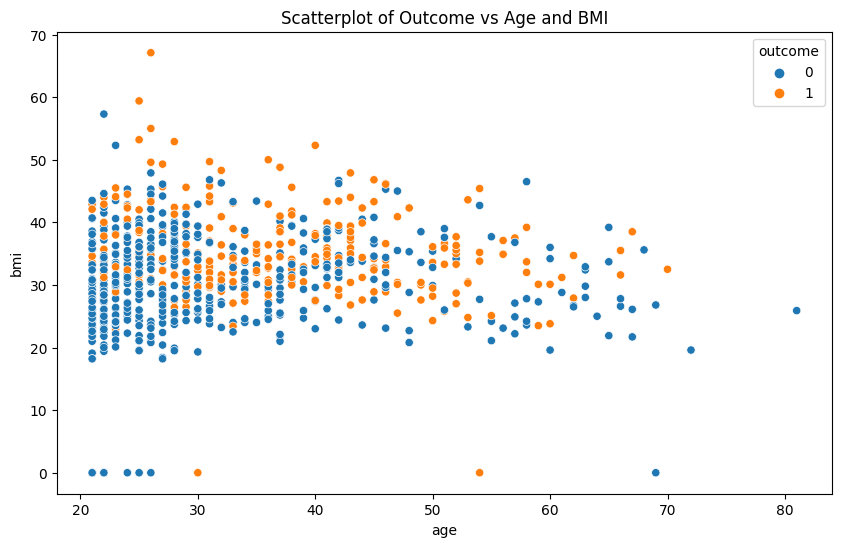

In [16]:
# Create a scatter plot of Outcome vs BMI and Age
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', hue='outcome', data=diabetes)
plt.title('Scatterplot of Outcome vs Age and BMI')
plt.show()


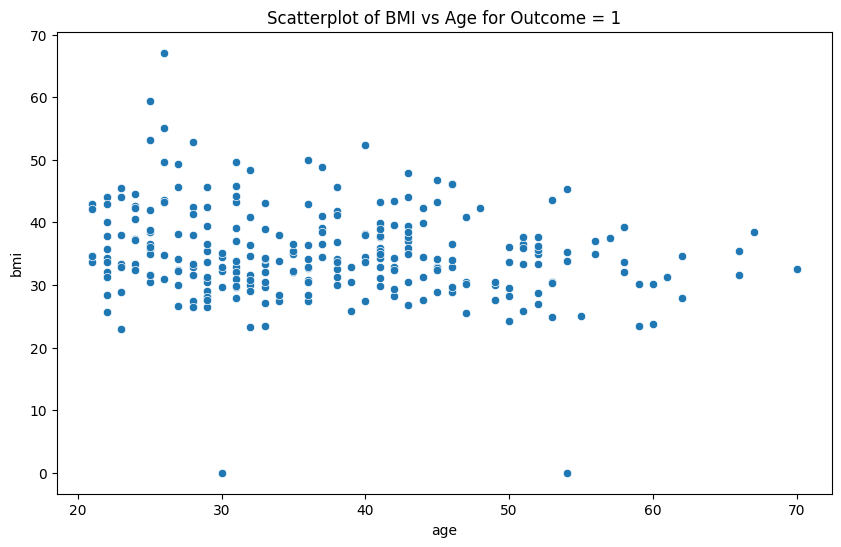

In [17]:
diabetes_outcome_1 = diabetes[diabetes['outcome'] == 1]

# Create a scatter plot of Outcome vs Age and BMI for Outcome = 1
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='bmi', data=diabetes_outcome_1)
plt.title('Scatterplot of BMI vs Age for Outcome = 1')
plt.show()

Можно заметить, что у пациентов с диабетом значения BMI и возраста распределены достаточно широко, но в целом чаще встречаются более высокие значения BMI и больший возраст.

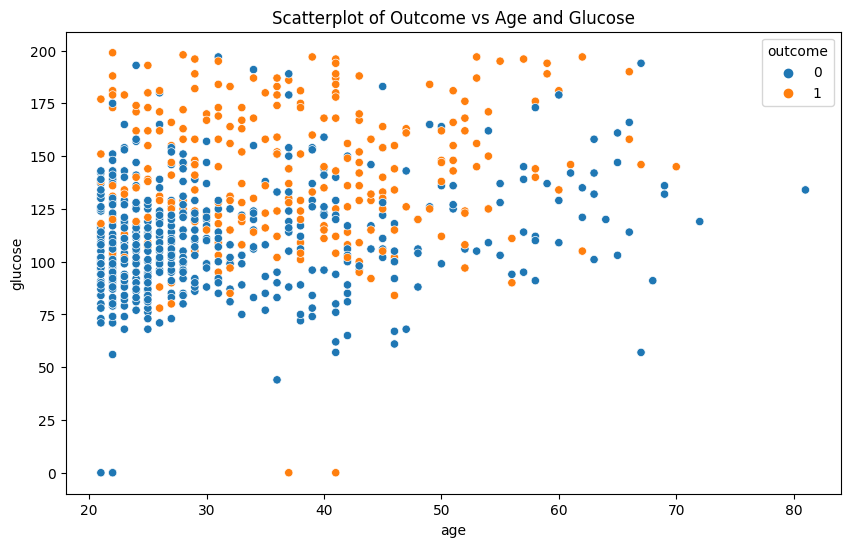

In [18]:
# Create a scatter plot of Outcome vs Age and Glucose
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='glucose', hue='outcome', data=diabetes)
plt.title('Scatterplot of Outcome vs Age and Glucose')
plt.show()


Можно заметить, что люди с более высоким уровнем глюкозы и более старшего возраста чаще имеют диабет. Это вполне логично, поскольку уровень глюкозы в крови является одним из ключевых показателей диабета.

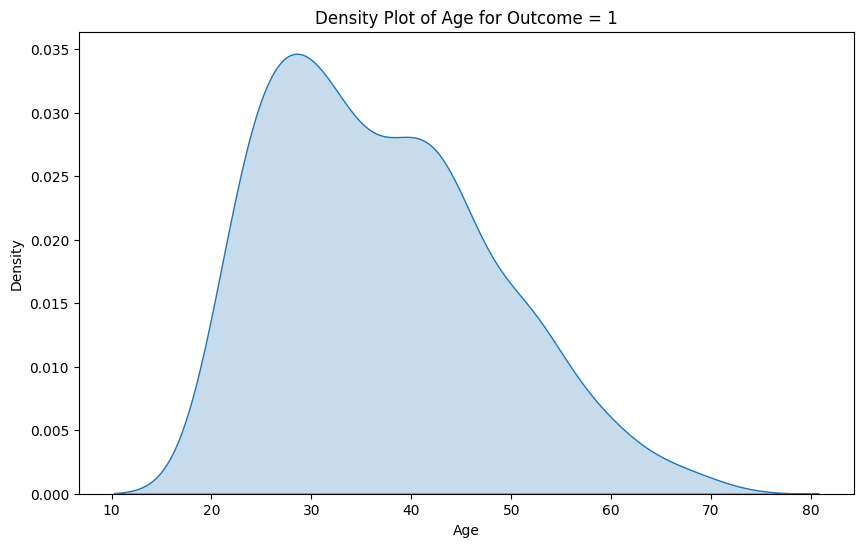

In [19]:
# Filter the dataframe to include only rows where Outcome is 1
diabetes_outcome_1 = diabetes[diabetes['outcome'] == 1]

# Create a scatter plot of variance of Age for Outcome = 1
plt.figure(figsize=(10, 6))
sns.kdeplot(diabetes_outcome_1['age'], fill=True)
plt.title('Density Plot of Age for Outcome = 1')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


Плотность представляет собой вероятность того, что случайная величина примет значение, близкое к данному. Таким образом, чем выше плотность в определенной точке, тем больше вероятность встретить эту величину в данных.

Можно заметить, что возраст большинства людей с диабетом находится в промежутке примерно от 20 до 60 лет, с пиком в районе 20-30 лет.

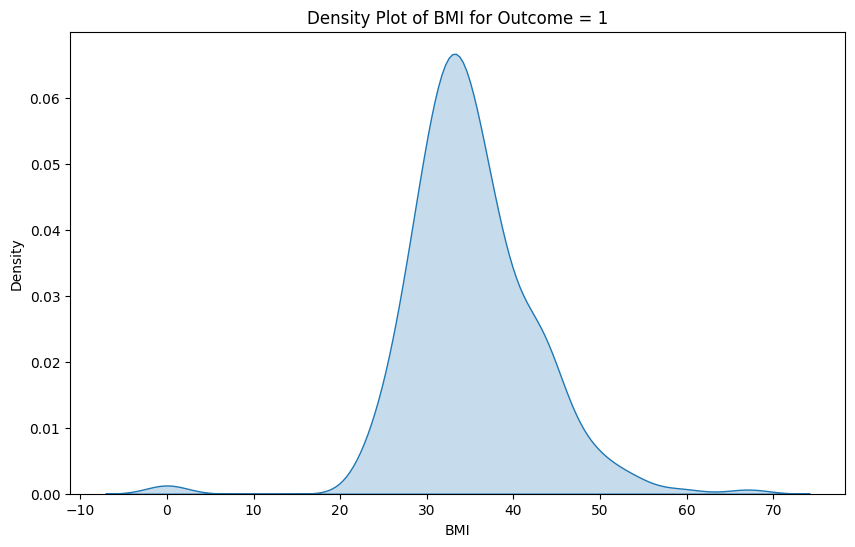

In [20]:
# Create a density plot of BMI for Outcome = 1
plt.figure(figsize=(10, 6))
sns.kdeplot(diabetes_outcome_1['bmi'], fill=True)
plt.title('Density Plot of BMI for Outcome = 1')
plt.xlabel('BMI')
plt.ylabel('Density')
plt.show()


На данном графике показана плотность распределения индекса массы тела (BMI) среди тех, у кого имеется диабет (Outcome = 1).

Можно заметить, что индекс массы тела большинства людей с диабетом находится в промежутке примерно от 25 до 45, с пиком в районе 30-35. Это указывает на то, что более высокий BMI может быть связан с большей вероятностью развития диабета.

**5) Обучите алгоритм KNN (k-ближайших соседей)**

5.1.0. Проанализируем данные для дальнейшего обучения модели.


5.1.1 Разделение датасета на параметры и целевое значение 'outcome'

In [22]:
X = diabetes.drop('outcome', axis=1)
y = diabetes['outcome']

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


5.1.2 Масштабирование признаков

In [89]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Загрузим данные в DataFrame для удобства
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

X_scaled_df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


5.1.3 Проведем анализ information value

In [90]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_scaled_df, y)

# Получение важности признаков
feature_importances = rf.feature_importances_

# Загрузим данные в DataFrame для визуализации
importance_df = pd.DataFrame({
    'Feature': X_scaled_df.columns,
    'Importance': feature_importances
})

# Сортировка по важности
importance_df = importance_df.sort_values(by='Importance', ascending=False)

importance_df

,Feature,Importance
1,glucose,0.267142
5,bmi,0.168769
7,age,0.131567
6,diabetespedigreefunction,0.122695
2,bloodpressure,0.088660
0,pregnancies,0.085017
4,insulin,0.071547
3,skinthickness,0.064604


Признаки упорядочены по убыванию важности. Самый важный признак - это glucose, а наименее важный - skinthickness.

Теперь, когда мы выбрали наиболее важные признаки, мы можем продолжить шаги 4.2 и 4.3: обучение модели k-ближайших соседей (KNN) с использованием методов Grid Search и кросс-валидации.
Сделаем вывод: Можно исключить параметр skinthickness



# 5.2. Проведем обучение модели

5.2.1. Проведем обучение модели по методу Grid Search

In [91]:
# Загрузка данных
url = "https://raw.githubusercontent.com/jeyvong/hw_1.1.15/main/diabetes.csv"
df = pd.read_csv(url)


In [92]:
# Приведение заголовков к нижнему регистру
df.columns = df.columns.str.lower()
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [93]:
# Разделение датасета на параметры и целевое значение 'outcome'
X = df.drop('outcome', axis=1)
y = df['outcome']

In [94]:
# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
# Загрузим данные в DataFrame для удобства
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


In [38]:
# Исключение признака 'skinthickness' из данных
X_scaled_df = X_scaled_df.drop('skinthickness', axis=1)


In [39]:
# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)


In [40]:
# Grid Search для определения оптимального k
knn = KNeighborsClassifier()
parameters = {'n_neighbors': range(1, 30)}
grid_search = GridSearchCV(knn, parameters, cv=5, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 30)}, scoring='roc_auc')

In [41]:
# Получение оптимального значения k
optimal_k = grid_search.best_params_['n_neighbors']

In [42]:
# Построение модели с оптимальным k
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [43]:
# Предсказание для тестовой выборки
y_pred = knn.predict_proba(X_test)[:, 1]

In [56]:
# Расчет ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)
roc_auc

0.789348025711662

In [95]:
# Получение средних оценок ROC AUC для каждого k
grid_mean_scores = grid_search.cv_results_['mean_test_score']


5.2.2. Проведем обучение модели по методу Cross Validation

In [96]:
# Задание диапазона k
k_range = range(1, 30)

In [97]:
# Список для хранения средних оценок ROC AUC для каждого k
roc_auc_scores = []

In [98]:
# Проведение кросс-валидации для каждого значения k
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='roc_auc')
    roc_auc_scores.append(scores.mean())

In [99]:
# Определение оптимального k
optimal_k_cv = k_range[roc_auc_scores.index(max(roc_auc_scores))]
optimal_k_cv, roc_auc

(21, 0.789348025711662)

In [100]:
# Обучение модели с оптимальным k
knn = KNeighborsClassifier(n_neighbors=optimal_k_cv)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=21)

In [101]:
# Предсказание для тестовой выборки
y_pred = knn.predict_proba(X_test)[:, 1]

In [102]:
# Расчет ROC AUC
roc_auc = roc_auc_score(y_test, y_pred)

optimal_k_cv, roc_auc

(21, 0.789348025711662)

#5.3. Ответы на вопросы

a)Как вы боролись с проблемой переобучения?
- Использование метода Information Value для выбора наиболее важных признаков и исключения менее важных. Это помогает уменьшить сложность модели и снизить риск переобучения.
- Подбор гиперпараметров: использование Grid Search и Cross-Validation для выбора оптимального значения k в алгоритме k-NN. Это помогает найти баланс между переобучением (когда модель слишком сложна и хорошо работает только на обучающих данных) и недообучением (когда модель слишком проста и не может достаточно хорошо предсказывать даже обучающие данные).
- Разделение данных на обучающую и тестовую выборку - это позволяет оценить, насколько хорошо модель может обобщать свои знания на новые данные.

b) Чему равен гиперпараметр k?
Гиперпараметр k равен 21.

c) Почему вы выбрали именно такой k?
Выбрал параметр k равным 21, т.к. это значение показало наилучшую оценку по метрике ROC AUC в процессе кросс-валидации и поиска по сетке (Grid Search).

ROC AUC (Area Under the Receiver Operating Characteristics Curve) — это площадь под кривой ошибок. Она измеряет, насколько хорошо модель может различать разные классы. Чем выше ROC AUC, тем лучше модель может различать между положительными и отрицательными классами.
Исследование, в котором варьируя параметр k от 1 до 30, и для каждого значения
k показало среднюю оценку ROC AUC на кросс-валидации. Оптимальное значение
k — это то, которое максимизирует эту среднюю оценку.

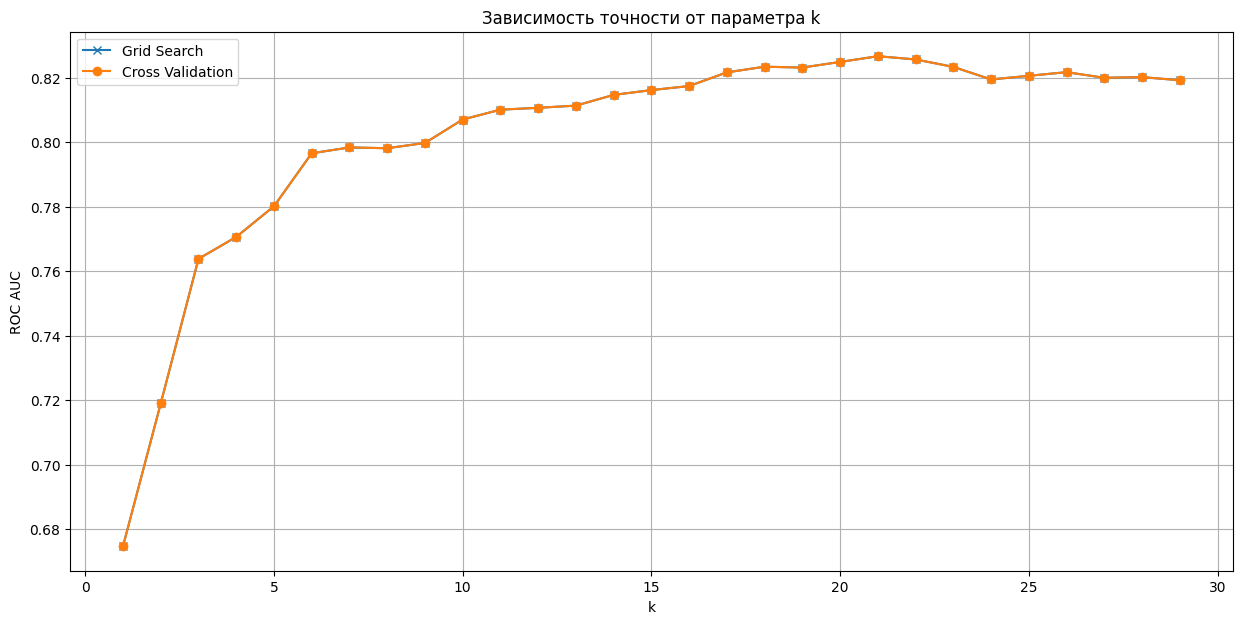

In [103]:
# Построение графиков зависимости точности от параметра k для Grid Search и Cross Validation
plt.figure(figsize=(15, 7))

plt.plot(range(1, 30), grid_mean_scores, marker='x', label="Grid Search")
plt.plot(k_range, roc_auc_scores, marker='o', label="Cross Validation")

plt.xlabel('k')
plt.ylabel('ROC AUC')
plt.title('Зависимость точности от параметра k')
plt.legend()

plt.grid()
plt.show()

d) На сколько ваш алгоритм верно предсказывает целевую переменную?
Я оценивал точность алгоритма с помощью метрики ROC AUC, которая измеряет способность модели различать между положительными и отрицательными классами. Значение ROC AUC варьируется от 0 до 1, где 1 означает, что модель идеально различает классы, а 0.5 означает, что модель не лучше случайного угадывания.

Для оптимального значения k (21), полученного как с помощью Grid Search, так и с помощью кросс-валидации, значение ROC AUC составляет примерно 0.789. Это означает, что алгоритм способен правильно классифицировать около 78.9% пар положительных и отрицательных примеров, выбранных случайным образом из данных.

Это достаточно хороший результат, особенно учитывая, что мы использовали довольно простой алгоритм машинного обучения k-ближайших соседей.